In [1]:
# https://data.cityofnewyork.us/api/v3/views/erm2-nwe9/query.json

In [2]:
!pip install -q plotly wordcloud

In [3]:
#imports and seeds 
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

np.random.seed(42)
sns.set(style = "whitegrid")
os.makedirs("artifacts", exist_ok =True)


In [4]:
#Datasets loading with required validation
possible_paths= [
    "data/nyc_311.csv",
    "data/NYC311data.csv",
    "contents/drive/MyDrive/nyc_311",
]

df =None
for p in possible_paths:
    if os.path.exists(p):
        try:
            df = pd.read_csv(p, low_memory=False)
            print(f"Loaded dataset from {p}")
            break
        except Exception as e:
            print(f"Attempted {p} but failed: {e}")
if  df is None:
    print("Dataset not found.please place csva at data/nyc311.csv")
    df = pd.DataFrame()

#Required validation 
print("df.shape->", df.shape)
print("df.columns->",df.columns.tolist())
display(df.sample(5) if len(df) else "No data")
        

Loaded dataset from data/NYC311data.csv
df.shape-> (300698, 53)
df.columns-> ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry T

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
142,32308293,12/31/2015 09:18:10 PM,01-01-16 2:56,NYPD,New York City Police Department,Vending,In Prohibited Area,Store/Commercial,10011.0,66 11 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744870,-74.008300,"(40.744870116326716, -74.00830042618357)"
31909,32092618,11/29/2015 03:47:29 PM,11/29/2015 03:59:35 PM,NYPD,New York City Police Department,Illegal Parking,Unauthorized Bus Layover,Street/Sidewalk,10002.0,2 PIKE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714285,-73.992818,"(40.7142853806812, -73.9928180150992)"
212326,30893897,06/20/2015 08:02:40 AM,06/20/2015 08:56:18 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11373.0,87-06 ELMHURST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744546,-73.878630,"(40.74454571536737, -73.87863027711899)"
237395,30726108,05/29/2015 09:32:27 PM,05/29/2015 11:03:39 PM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11224.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.571655,-73.991386,"(40.571655307846456, -73.99138634269627)"
226367,30794640,06-08-15 0:18,06-08-15 0:34,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11238.0,14 PUTNAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682725,-73.961302,"(40.68272525814121, -73.96130197660837)"


In [5]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [6]:
#initial cleaning
if df.shape[0] > 0:
    # Strip whitespace
    for c in df.select_dtypes(include="object").columns:
        df[c] = df[c].astype(str).str.strip()

    # Standard timestamp parsing
    for col in ["Created Date", "Closed Date", "CreatedDate", "ClosedDate"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")

    # Create normalized columns
    if "Created Date" in df.columns and "Closed Date" in df.columns:
        df["response_hours"] = (
            df["Closed Date"] - df["Created Date"]
        ).dt.total_seconds() / 3600

    # Standardize borough name
    if "Borough" in df.columns:
        df["Borough"] = df["Borough"].str.title()
    
    print(df.head())


C:\Users\athar\AppData\Local\Temp\ipykernel_23760\3577648239.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\athar\AppData\Local\Temp\ipykernel_23760\3577648239.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


   Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Stree

In [7]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,response_hours
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,nan,nan,nan,NaN,nan,nan,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,nan,nan,nan,NaN,nan,nan,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,nan,nan,nan,NaN,nan,nan,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,nan,nan,nan,NaN,nan,nan,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,nan,nan,nan,NaN,nan,nan,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.450556


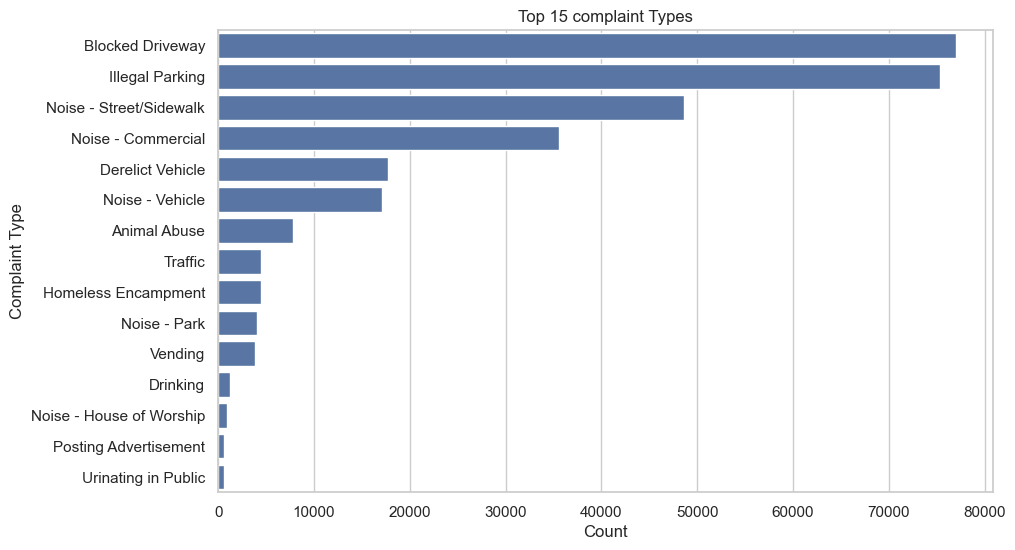

In [8]:
#Univariate EDA- complaint types
if 'Complaint Type' in df.columns:
    top_ct = df ["Complaint Type"].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_ct.values, y = top_ct.index)
    plt.title("Top 15 complaint Types")
    plt.xlabel("Count")
    plt.savefig("artifacts/complaint_type_count.png", dpi =150, bbox_inches = 'tight')
    plt.show()
    

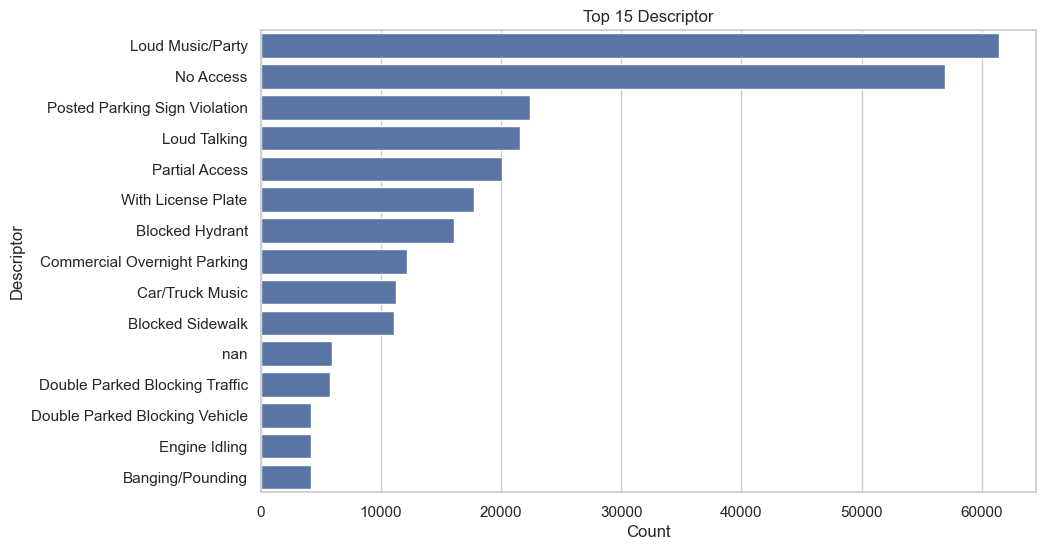

In [9]:
if "Descriptor" in df.columns:
    top_ct = df["Descriptor"].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_ct.values, y=top_ct.index)
    plt.title("Top 15 Descriptor")
    plt.xlabel("Count")
    plt.savefig("artifacts/descriptor_counts.png", dpi=150, bbox_inches="tight")
    plt.show()


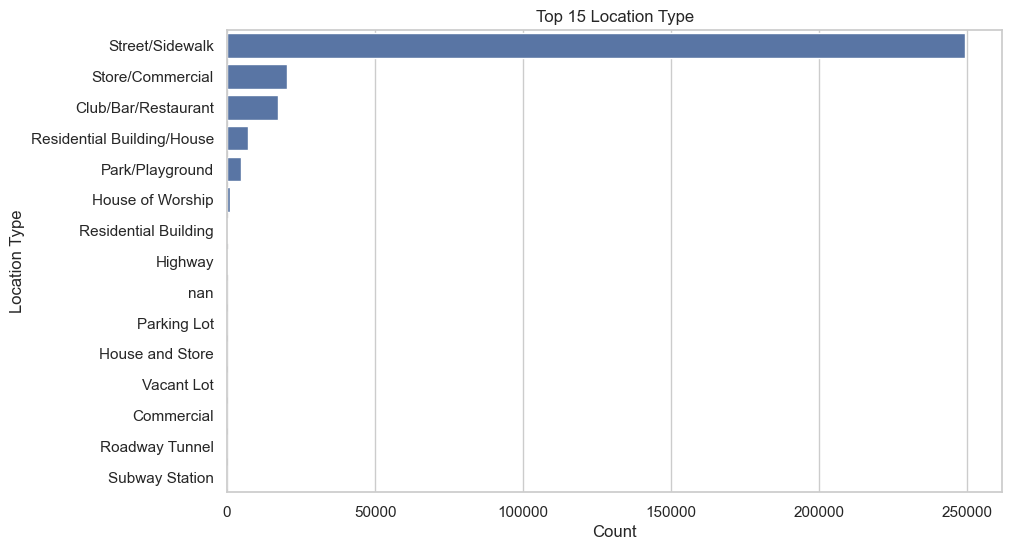

In [10]:
if "Location Type" in df.columns:
    top_ct = df["Location Type"].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_ct.values, y=top_ct.index)
    plt.title("Top 15 Location Type")
    plt.xlabel("Count")
    plt.savefig("artifacts/location_type_counts.png", dpi=150, bbox_inches="tight")
    plt.show()


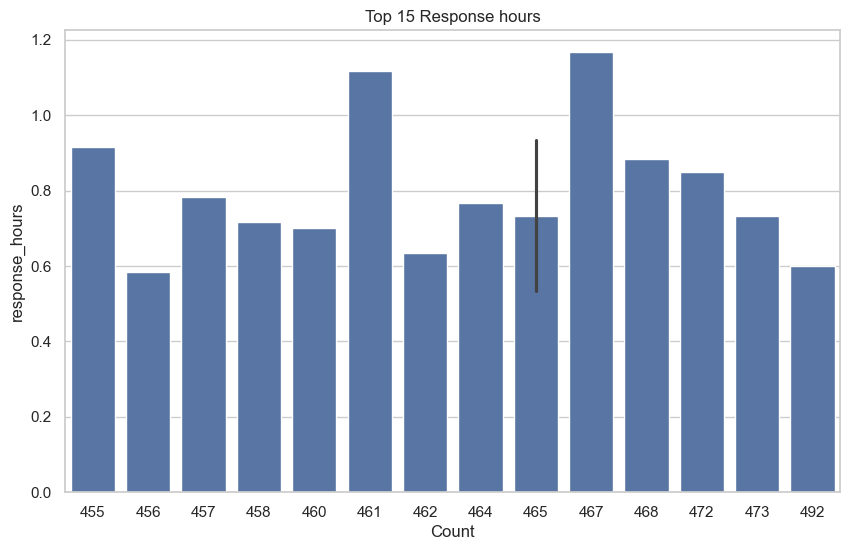

In [11]:
if "response_hours" in df.columns:
    top_ct = df["response_hours"].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_ct.values, y=top_ct.index)
    plt.title("Top 15 Response hours")
    plt.xlabel("Count")
    plt.savefig("artifacts/response_hour_counts.png", dpi=150, bbox_inches="tight")
    plt.show()


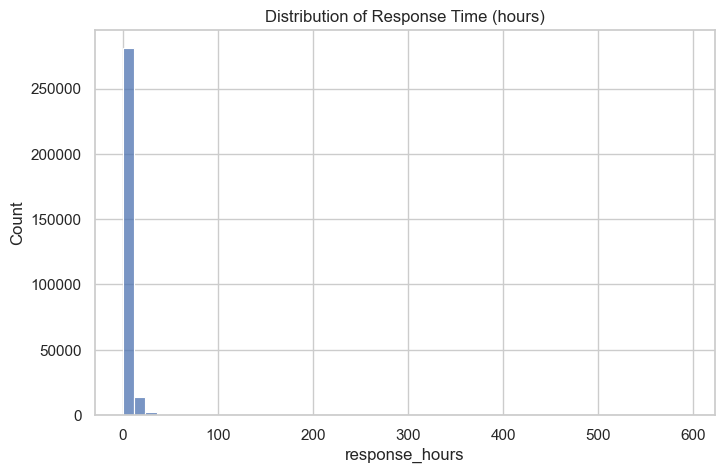

In [12]:
# Response time distribution
if 'response_hours' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["response_hours"].dropna(), bins =50)
    plt.title("Distribution of Response Time (hours)")
    plt.savefig("artifacts/response_time_distribution.png", dpi =150, bbox_inches = 'tight')
    plt.show()

In [13]:
#Bivariate EDA- Complaint type vs Borough
if {"Complaint Type","Borough"}.issubset(df.columns):
    ct_b = pd.crosstab(df["Complaint Type"], df["Borough"])
    ct_b.head()


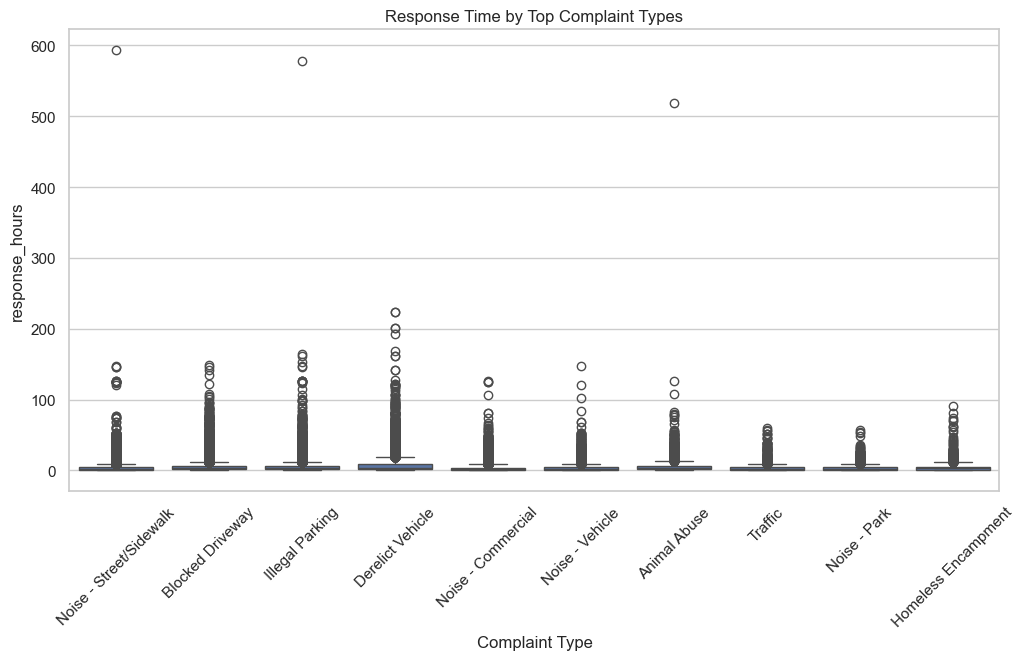

In [14]:
#Response hours vs Complaint hours 
if {"response_hours","Complaint Type"}.issubset(df.columns):
    top10 = df["Complaint Type"].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot (
        data = df[df["Complaint Type"].isin(top10)],
        x= "Complaint Type",
        y = "response_hours"
    )
    plt.xticks(rotation=45)
    plt.title("Response Time by Top Complaint Types")
    plt.savefig("artifacts/response_time_by_complin_type.png", dpi =150, bbox_inches = 'tight')
    plt.show()

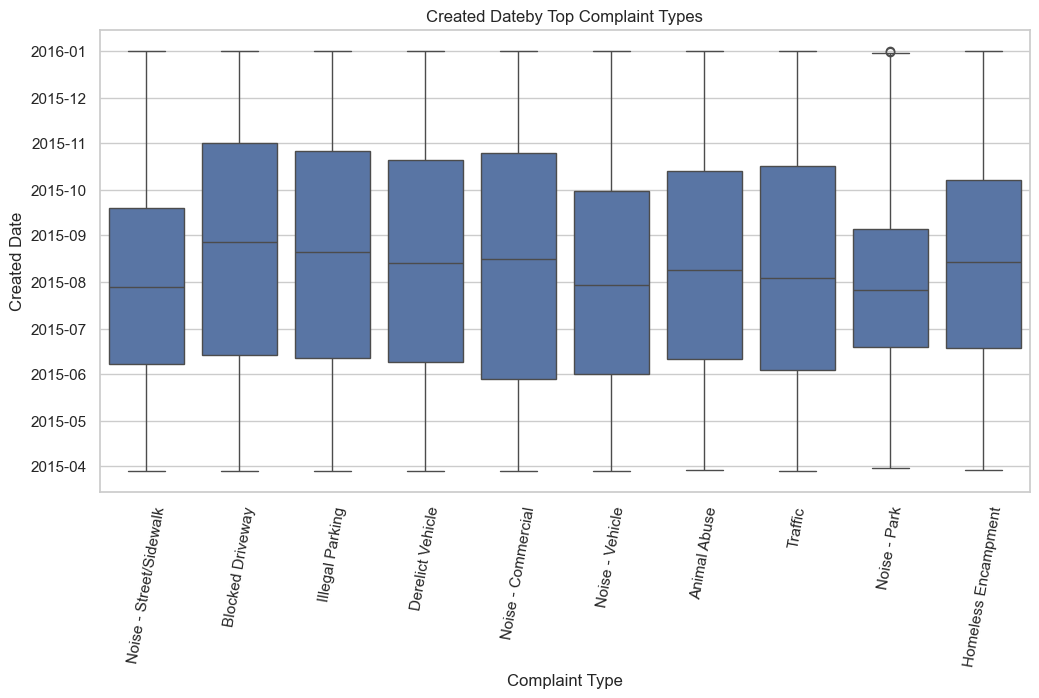

In [18]:
#Response hours vs Complaint hours 
if {"Created Date","Complaint Type"}.issubset(df.columns):
    top10 = df["Complaint Type"].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot (
        data = df[df["Complaint Type"].isin(top10)],
        x= "Complaint Type",
        y = "Created Date"
    )
    plt.xticks(rotation=80)
    plt.title("Created Date by Top Complaint Types")
    plt.savefig("artifacts/response_time_by_complin_type.png", dpi =150, bbox_inches = 'tight')
    plt.show()

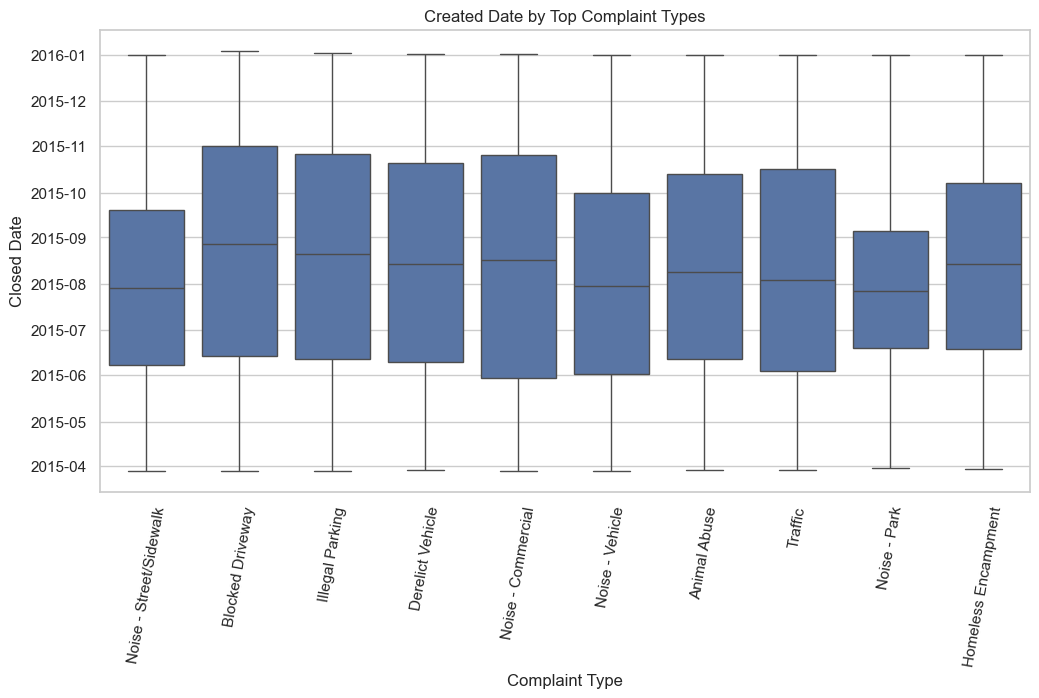

In [19]:
#Response hours vs Complaint hours 
if {"Closed Date","Complaint Type"}.issubset(df.columns):
    top10 = df["Complaint Type"].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot (
        data = df[df["Complaint Type"].isin(top10)],
        x= "Complaint Type",
        y = "Closed Date"
    )
    plt.xticks(rotation=80)
    plt.title("Created Date by Top Complaint Types")
    plt.savefig("artifacts/response_time_by_complin_type.png", dpi =150, bbox_inches = 'tight')
    plt.show()

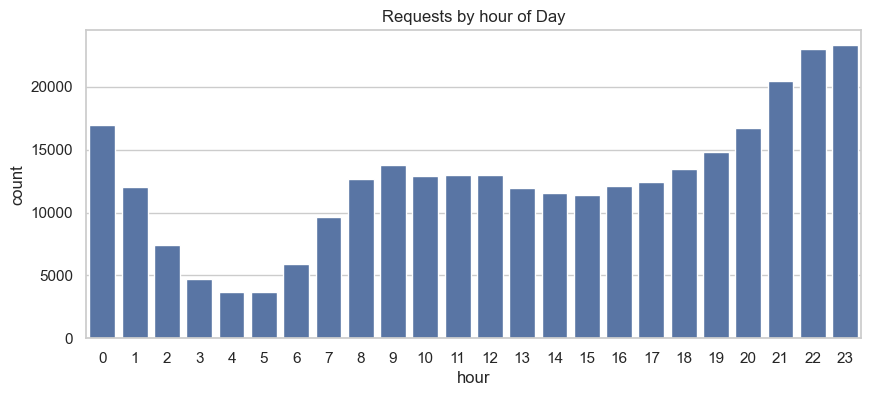

In [15]:
#Time of Day  patterns
if "Created Date" in df.columns:
    df["hour"] = df["Created Date"].dt.hour
    plt.figure(figsize=(10,4))
    sns.countplot(x="hour", data = df)
    plt.title("Requests by hour of Day")
    plt.savefig("artifacts/requests_by_hour.png", dpi =150 ,bbox_inches = 'tight')
    plt.show()

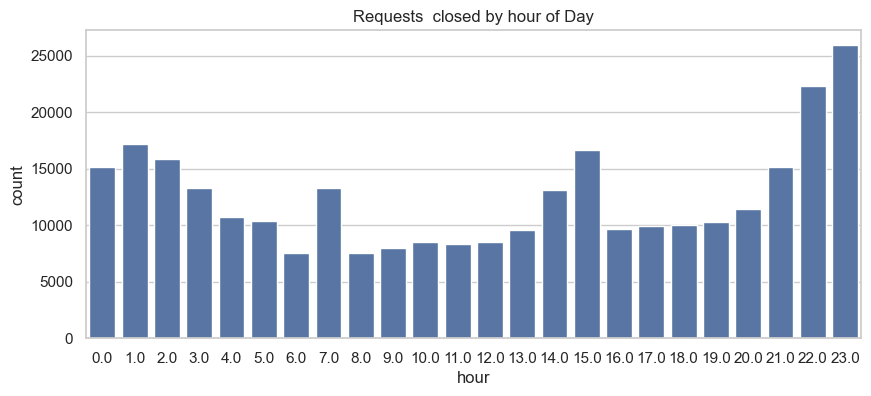

In [16]:
#Time of Day  patterns
if "Closed Date" in df.columns:
    df["hour"] = df["Closed Date"].dt.hour
    plt.figure(figsize=(10,4))
    sns.countplot(x="hour", data = df)
    plt.title("Requests  closed by hour of Day")
    plt.savefig("artifacts/requests_closed_date_by_hour.png", dpi =150 ,bbox_inches = 'tight')
    plt.show()

In [26]:
# Text analysis 
from collections import Counter
import re

if "Descriptor" in df.columns:
    text_series = df["Descriptor"].dropna().astype(str).sample(5000,random_state = 42)
    words= []

    for t in text_series:
        tokens = re.findall(r"[A-Za-z]+",t.lower())
        words.extend(tokens)

    top_words = Counter(words).most_common(30)
    print("Top 30 Keywords:", top_words)

Top 30 Keywords: [('loud', 1353), ('access', 1294), ('music', 1237), ('party', 1019), ('no', 964), ('parking', 567), ('blocked', 428), ('violation', 382), ('posted', 361), ('sign', 361), ('partial', 336), ('talking', 332), ('with', 323), ('license', 323), ('plate', 323), ('truck', 286), ('car', 277), ('commercial', 245), ('overnight', 245), ('hydrant', 244), ('sidewalk', 184), ('double', 160), ('parked', 160), ('blocking', 160), ('nan', 114), ('traffic', 87), ('vehicle', 84), ('banging', 60), ('pounding', 60), ('engine', 59)]


In [27]:
# Text analysis 
from collections import Counter
import re

if "Complaint Type" in df.columns:
    text_series = df["Complaint Type"].dropna().astype(str).sample(5000,random_state = 42)
    words= []

    for t in text_series:
        tokens = re.findall(r"[A-Za-z]+",t.lower())
        words.extend(tokens)

    top_words = Counter(words).most_common(30)
    print("Top 30 Keywords:", top_words)

Top 30 Keywords: [('noise', 1745), ('blocked', 1294), ('driveway', 1294), ('illegal', 1225), ('parking', 1219), ('street', 768), ('sidewalk', 768), ('vehicle', 623), ('commercial', 569), ('derelict', 323), ('animal', 127), ('abuse', 127), ('park', 85), ('homeless', 81), ('encampment', 81), ('traffic', 71), ('vending', 70), ('house', 23), ('of', 23), ('worship', 23), ('drinking', 20), ('urinating', 14), ('in', 14), ('public', 14), ('posting', 12), ('advertisement', 12), ('bike', 10), ('roller', 10), ('skate', 10), ('chronic', 10)]


In [28]:
# Text analysis 
from collections import Counter
import re

if "Incident Address" in df.columns:
    text_series = df["Incident Address"].dropna().astype(str).sample(5000,random_state = 42)
    words= []

    for t in text_series:
        tokens = re.findall(r"[A-Za-z]+",t.lower())
        words.extend(tokens)

    top_words = Counter(words).most_common(30)
    print("Top 30 Keywords:", top_words)

Top 30 Keywords: [('street', 2082), ('avenue', 1467), ('nan', 766), ('east', 435), ('west', 317), ('place', 153), ('boulevard', 141), ('road', 138), ('broadway', 51), ('south', 46), ('drive', 44), ('beach', 38), ('st', 34), ('parkway', 33), ('grand', 32), ('bay', 30), ('th', 28), ('park', 27), ('court', 21), ('north', 21), ('madison', 20), ('saint', 20), ('lane', 18), ('sherman', 18), ('terrace', 17), ('nicholas', 16), ('parsons', 16), ('bedford', 14), ('steinway', 14), ('powell', 14)]


In [29]:
#Save cleaned snapshot
if df.shape[0]> 0:
    df.to_csv("artifacts/nyc311_cleaned_snapshot.csv", index = False)
    print("Saved cleaned dataset snapshot")

Saved cleaned dataset snapshot
